## Import of libraries

In [10]:
#!pip yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

## Bitcoin Dataset 

[*********************100%***********************]  1 of 1 completed


Text(0, 0.5, 'Prices ($)')

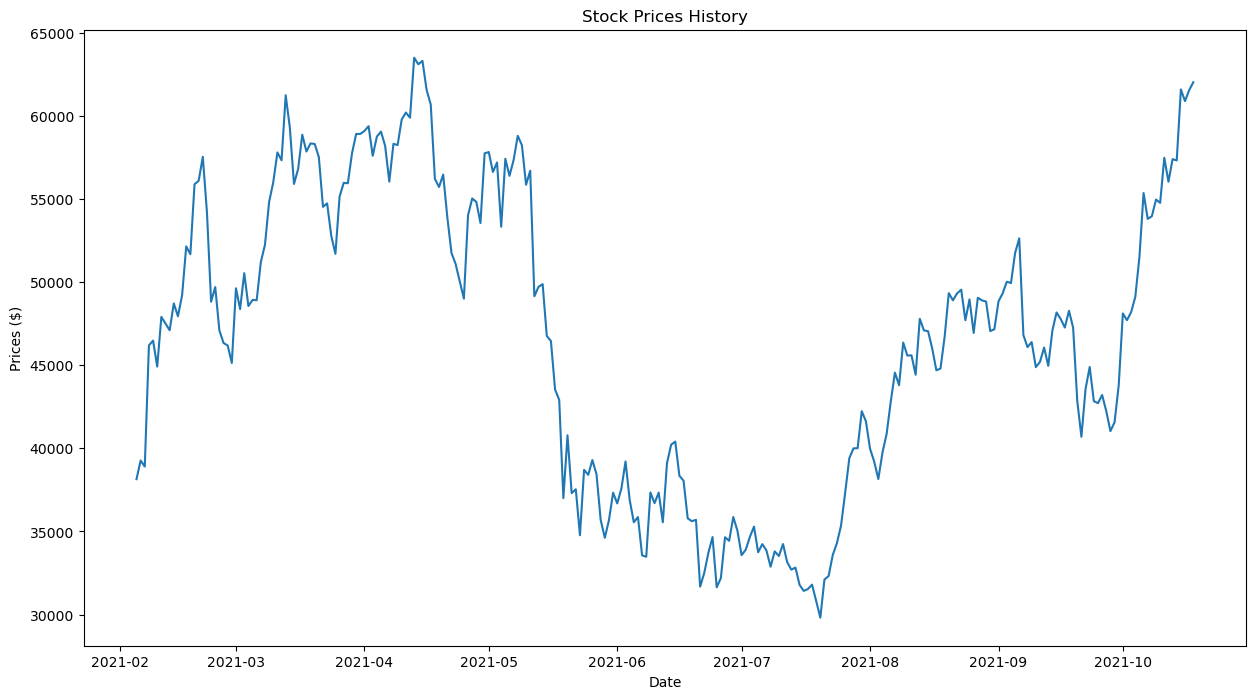

In [6]:
stock_data = yf.download('BTC-USD', start="2021-02-05", end="2021-10-19")

plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [7]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,38144.308594,58598066402
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,39266.011719,71326033653
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,38903.441406,65500641143
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,46196.464844,101467222687
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,46481.105469,91809846886


## Sentiment score dataset

In [12]:
sentiment_df = pd.read_csv("./daily_score from 2021-02-05 to 2021-05-29.csv")

In [13]:
sentiment_df.head()

,day_date,weighted_positive_score,weighted_neutral_score,weighted_negative_score,total,date
0,2021-02-05,0.322386,0.579557,0.098057,9292882.0,2021-02-05
1,2021-02-06,0.369837,0.551609,0.078554,35499712.0,2021-02-06
2,2021-02-07,0.372872,0.394746,0.232381,45388049.0,2021-02-07
3,2021-02-08,0.499037,0.405186,0.095777,280623237.0,2021-02-08
4,2021-02-09,0.571332,0.279033,0.149636,268020760.0,2021-02-09
